# Tutorial 2: Subsample

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import oceanspy as ospy
import numpy as np
od = ospy.open_oceandataset.get_started()

/home/idies/workspace/Storage/malmans2/persistent/ESIP/oceanspy/oceanspy/plot.py:17: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  _matplotlib.use('agg')
/home/idies/workspace/Storage/malmans2/persistent/ESIP/oceanspy/oceanspy/animate.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  _matplotlib.use('agg')


Opening [Getting Started with OceanSpy]:
[A small cutout from EGshelfIIseas2km_ASR.].


/home/idies/miniconda3/lib/python3.6/site-packages/dask/array/blockwise.py:204: UserWarning: The da.atop function has moved to da.blockwise
  warnings.warn("The da.atop function has moved to da.blockwise")


OceanSpy operates on Arakawa C grids. Here is how the grid of this dataset looks like:

In [2]:
# Print grid
print(od.grid)
print()
print(od.dataset.coords)

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z (139) --> left
  * left     Zl (139) --> center
  * outer    Zp1 (140) --> center
  * right    Zu (139) --> center
time Axis (not periodic):
  * center   time_midp (39) --> outer
  * outer    time (40) --> center
Y Axis (not periodic):
  * center   Y (262) --> outer
  * outer    Yp1 (263) --> center
X Axis (not periodic):
  * center   X (341) --> outer
  * outer    Xp1 (342) --> center

Coordinates:
  * Z          (Z) float64 -1.0 -3.5 -7.0 ... -1.956e+03 -1.972e+03 -1.986e+03
  * Zp1        (Zp1) float64 0.0 -2.0 -5.0 ... -1.964e+03 -1.979e+03 -1.994e+03
  * Zu         (Zu) float64 -2.0 -5.0 -9.0 ... -1.964e+03 -1.979e+03 -1.994e+03
  * Zl         (Zl) float64 0.0 -2.0 -5.0 ... -1.949e+03 -1.964e+03 -1.979e+03
  * X          (X) float64 -29.98 -29.94 -29.89 -29.85 ... -15.12 -15.07 -15.03
  * Y          (Y) float64 66.01 66.03 66.05 66.07 ... 70.93 70.95 70.97 70.99
    XC         (Y, X) float64 dask.array<shape=(262, 341), chunksize=(

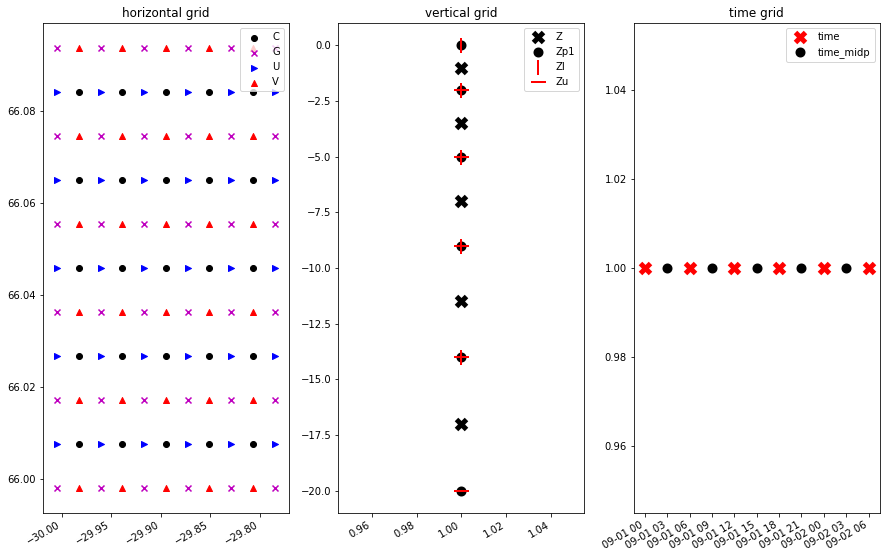

In [3]:
# Plot grid
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))
fig.autofmt_xdate()
n_point = 5

# Horizontal dimension
ax1.scatter(od.dataset['XC'].isel(X  =slice(n_point),   Y=slice(n_point)), 
            od.dataset['YC'].isel(X  =slice(n_point),   Y=slice(n_point)),     c='k', marker='o', label='C')
ax1.scatter(od.dataset['XG'].isel(Xp1=slice(n_point+1), Yp1=slice(n_point+1)), 
            od.dataset['YG'].isel(Xp1=slice(n_point+1), Yp1=slice(n_point+1)), c='m', marker='x', label='G')
ax1.scatter(od.dataset['XU'].isel(Xp1=slice(n_point+1), Y=slice(n_point)), 
            od.dataset['YU'].isel(Xp1=slice(n_point+1), Y=slice(n_point)),     c='b', marker='>', label='U')
ax1.scatter(od.dataset['XV'].isel(X  =slice(n_point),   Yp1=slice(n_point+1)), 
            od.dataset['YV'].isel(X  =slice(n_point),   Yp1=slice(n_point+1)), c='r', marker='^', label='V')
ax1.set_title('horizontal grid')
_ = ax1.legend()

# Vertical dimension
ax2.plot(np.ones(n_point)  , od.dataset['Z'].isel(Z=slice(n_point)).values      , 'kx', ms=10, mew=5, label='Z')
ax2.plot(np.ones(n_point+1), od.dataset['Zp1'].isel(Zp1=slice(n_point+1)).values, 'k.', ms=10, mew=5, label='Zp1')
ax2.plot(np.ones(n_point)  , od.dataset['Zl'].isel(Zl=slice(n_point)).values    , 'r|', ms=15, mew=2, label='Zl')
ax2.plot(np.ones(n_point)  , od.dataset['Zu'].isel(Zu=slice(n_point)).values    , 'r_', ms=15, mew=2, label='Zu')
ax2.set_title('vertical grid')
_ =  ax2.legend()

# Time dimension
ax3.plot_date(od.dataset['time'].isel(time=slice(n_point+1)).values        , np.ones(n_point+1),  'rx', ms=10, mew=5, label='time')
ax3.plot_date(od.dataset['time_midp'].isel(time_midp=slice(n_point)).values, np.ones(n_point)  ,  'k.', ms=10, mew=5, label='time_midp')
ax3.set_title('time grid')
_ = ax3.legend()

## Cutout
Most of OceanSpy's functions need this grid structure. However, most of the time users don't need to perform their analysis on the whole domain. 
Cutout reduces the amount of data preserving the original grid structure. It's a very important function because it's used by many other OceanSpy's functions.

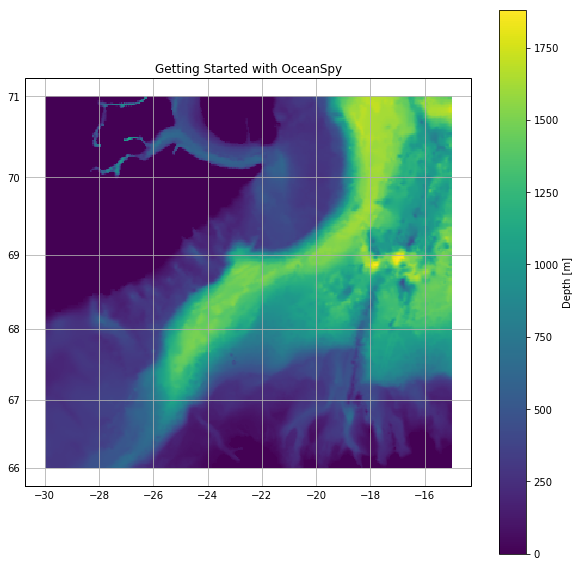

In [4]:
# Plot map
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax = od.plot.horizontal_section(varName='Depth')
_ = ax.set_title(od.name)

In [5]:
# Cut oceandataset
cut_od = od.subsample.cutout(XRange=[-26, -20], 
                             YRange=[68, 69], 
                             ZRange=0, 
                             timeRange=['2007-09-01']).set_name('CUT', overwrite=False)

Cutting out the oceandataset.


In [6]:
# Print grid
print(cut_od.grid)
print()
print(cut_od.dataset.coords)

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z (1) --> left
  * left     Zl (1) --> center
  * outer    Zp1 (2) --> center
  * right    Zu (1) --> center
time Axis (not periodic):
  * center   time_midp (1) --> outer
  * outer    time (2) --> center
Y Axis (not periodic):
  * center   Y (52) --> outer
  * outer    Yp1 (53) --> center
X Axis (not periodic):
  * center   X (136) --> outer
  * outer    Xp1 (137) --> center

Coordinates:
  * Z          (Z) float64 -1.0
  * Zp1        (Zp1) float64 0.0 -2.0
  * Zu         (Zu) float64 -2.0
  * Zl         (Zl) float64 0.0
  * X          (X) float64 -25.98 -25.94 -25.89 -25.85 ... -20.13 -20.09 -20.04
  * Y          (Y) float64 68.01 68.03 68.05 68.07 ... 68.93 68.95 68.97 68.99
    XC         (Y, X) float64 dask.array<shape=(52, 136), chunksize=(52, 136)>
    YC         (Y, X) float64 dask.array<shape=(52, 136), chunksize=(52, 136)>
  * Xp1        (Xp1) float64 -26.0 -25.96 -25.91 -25.87 ... -20.11 -20.07 -20.02
    XU         (Y, Xp1) fl

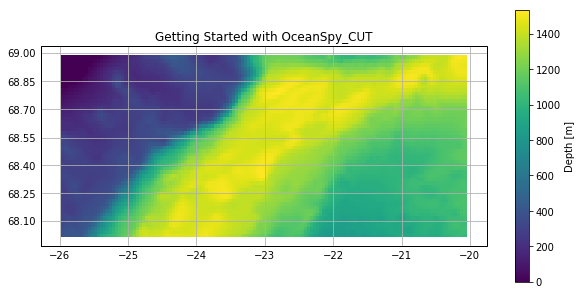

In [7]:
# Plot map
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax = cut_od.plot.horizontal_section(varName='Depth')
_  = ax.set_title(cut_od.name)

In order to preserve the original grid, `subsample.cutout` keeps all axes unchanged and there are 2 Zp1 points and 2 time points even if we selected just one vertical level and one snapshot. However, users can force `subsample.cuotout` to drop some axes. Note that we can use `subsample.cuotout` on an oceandataset that has been previously cut.

In [8]:
drop_od = cut_od.subsample.cutout(ZRange=0, 
                                  timeRange='2007-09-01', 
                                  dropAxes=['time']) # Set dropAxes=True to drop Z as well
# Print grid
print(drop_od.grid)
print()
print(drop_od.dataset.coords)

Cutting out the oceandataset.
<xgcm.Grid>
Z Axis (not periodic):
  * center   Z (1) --> left
  * left     Zl (1) --> center
  * outer    Zp1 (2) --> center
  * right    Zu (1) --> center
Y Axis (not periodic):
  * center   Y (52) --> outer
  * outer    Yp1 (53) --> center
X Axis (not periodic):
  * center   X (136) --> outer
  * outer    Xp1 (137) --> center

Coordinates:
  * Z          (Z) float64 -1.0
  * Zp1        (Zp1) float64 0.0 -2.0
  * Zu         (Zu) float64 -2.0
  * Zl         (Zl) float64 0.0
  * X          (X) float64 -25.98 -25.94 -25.89 -25.85 ... -20.13 -20.09 -20.04
  * Y          (Y) float64 68.01 68.03 68.05 68.07 ... 68.93 68.95 68.97 68.99
    XC         (Y, X) float64 dask.array<shape=(52, 136), chunksize=(52, 136)>
    YC         (Y, X) float64 dask.array<shape=(52, 136), chunksize=(52, 136)>
  * Xp1        (Xp1) float64 -26.0 -25.96 -25.91 -25.87 ... -20.11 -20.07 -20.02
    XU         (Y, Xp1) float64 dask.array<shape=(52, 137), chunksize=(52, 137)>
    YU     

## Mooring Array
Moorings are collecions of oceanographic instruments, connected to a cable which is kept under tension by an anchor and a buoy. Observational oceanographers deploy mooring arrays to estimate the eulerian properties of vertical sections. `subsample.mooring_array` applies the same technique on model output. These are the main features:  

* No interpolation is performed and the native grid structure is unchanged. Every mooring is associated with 1 C point (e.g., for hydrography), 2 U points (e.g., for zonal component of velocity), 2 V points (e.g., for meridional component of velocity), 4 G points (e.g., for vertical component of relative vorticity).

* Mooring array paths follow the grid (zig-zag path). Because of this, it's possible to produce accurate estimation of fluxes through the section.

* Mooring array paths follow the great-circle path (when spherical coordinates are used).

* Mooring array supports closed paths.  

Let's use the [Kögur morring array](http://kogur.whoi.edu/php/index.php) as example:

In [9]:
lats_Kogur = [ 68.68,  67.52,  66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
od_Kogur = od.subsample.mooring_array(Xmoor=lons_Kogur, 
                                      Ymoor=lats_Kogur, 
                                      timeRange='2007-09-01',
                                      dropAxes=True,
                                      varList=['Sigma0', 'U', 'V', 'momVort3']).set_name('Mooring array', overwrite=True,)

Cutting out the oceandataset.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Extracting mooring array.


In [10]:
# Print grid
print(od_Kogur.grid)
print()
print(od_Kogur.dataset.coords)

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z (139) --> left
  * left     Zl (139) --> center
  * outer    Zp1 (140) --> center
  * right    Zu (139) --> center
mooring Axis (not periodic):
  * center   mooring_midp (190) --> outer
  * outer    mooring (191) --> center
Y Axis (not periodic):
  * center   Y (1) --> outer
  * outer    Yp1 (2) --> center
X Axis (not periodic):
  * center   X (1) --> outer
  * outer    Xp1 (2) --> center

Coordinates:
  * mooring_midp       (mooring_midp) float64 0.5 1.5 2.5 ... 187.5 188.5 189.5
  * mooring            (mooring) int64 0 1 2 3 4 5 6 ... 185 186 187 188 189 190
  * Y                  (Y) int64 0
  * Yp1                (Yp1) int64 0 1
  * X                  (X) int64 0
  * Xp1                (Xp1) int64 0 1
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -1.972e+03 -1.986e+03
  * time               (time) datetime64[ns] 2007-09-01
  * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -1.979e+03 -1.994e+03
  * Zu                 (Zu

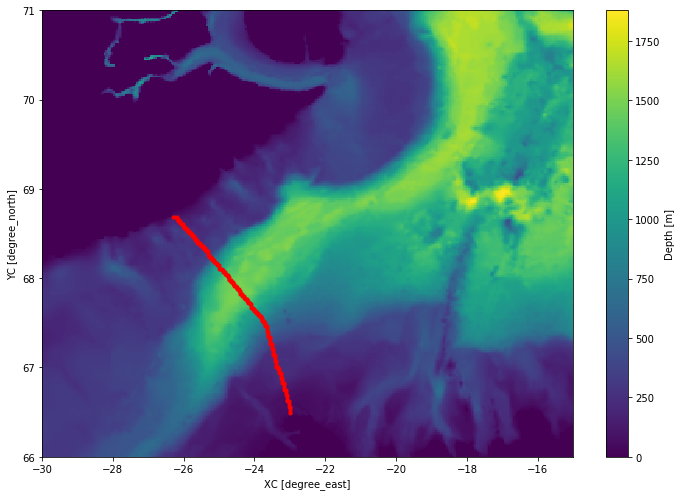

In [11]:
# Plot map
fig, ax = plt.subplots(1,1, figsize=(10, 7))
ax = ospy.plot.horizontal_section(od.set_projection(None), varName='Depth')
_ = ax.plot(od_Kogur.dataset['XC'].squeeze(), od_Kogur.dataset['YC'].squeeze(), 'r.')

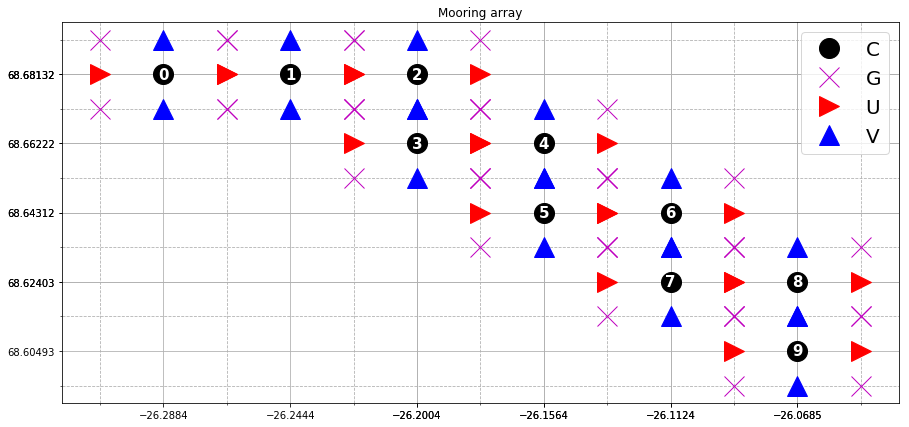

In [12]:
# Plot grid
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
n_moorings = 10
for i, (pos, mark, col) in enumerate(zip(['C', 'G', 'U', 'V'],
                                         ['o', 'x', '>', '^'],
                                         ['k', 'm', 'r', 'b'])):
    ax.plot(od_Kogur.dataset['X'+pos].isel(mooring=slice(n_moorings)).values.flatten(), 
            od_Kogur.dataset['Y'+pos].isel(mooring=slice(n_moorings)).values.flatten(), col+mark,
            markersize = 20, label=pos)

for i in range(n_moorings):
    ax.annotate(str(i), (od_Kogur.dataset['XC'].isel(mooring=i).squeeze(),
                         od_Kogur.dataset['YC'].isel(mooring=i).squeeze()), 
                size=15, weight="bold", color='w', ha='center', va='center')
ax.legend(prop={'size': 20})
ax.set_xticks(od_Kogur.dataset['XC'].isel(mooring=slice(n_moorings)).squeeze(), minor=False)
ax.set_yticks(od_Kogur.dataset['YC'].isel(mooring=slice(n_moorings)).squeeze(), minor=False)
ax.set_xticks(np.unique(od_Kogur.dataset['XG'].isel(mooring=slice(n_moorings)).squeeze()), minor=True)
ax.set_yticks(np.unique(od_Kogur.dataset['YG'].isel(mooring=slice(n_moorings)).squeeze()), minor=True)
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--')
_ = ax.set_title(od_Kogur.name)

Regridding [V] along [Y]-axis.


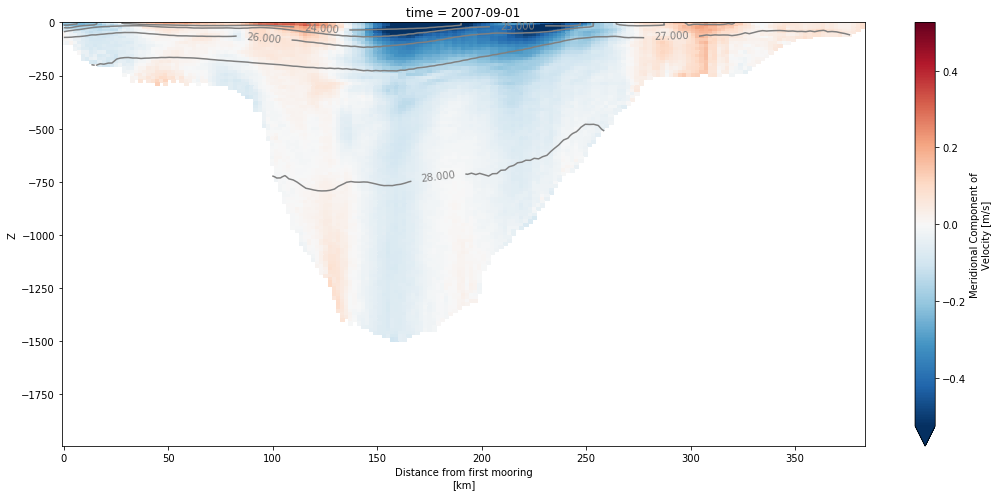

In [13]:
# Plot vertical section
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
_ = od_Kogur.plot.vertical_section(varName='V', contourName='Sigma0', robust=True)

## Survey Stations
Ship surveys are also used by observational oceanographers to collect data. [Here](http://www.whoi.edu/denmarkstrait/about-the-expedition) is an example of a ship survey conducted in Denmark Strait. The OceanSpy's function resembling ship surveys is `subsample.survey_stations`. It also produces vertical sections, but it's quite different from `subsample.mooring_array`:

* The original horizontal grid structure is not preserved.

* Data are interpolated (using [xesmf](https://xesmf.readthedocs.io/)).

* The interpolation is triggered right away, no lazy computation.

Let use Kögur again as example:

In [14]:
od_survey = od.subsample.survey_stations(Xsurv=lons_Kogur, 
                                         Ysurv=lats_Kogur, 
                                         timeRange='2007-09-01',
                                         delta=2, # Set this to None if you don't wan equally spaced stations
                                         dropAxes=['time'],
                                         varList=['Sigma0', 'U', 'V', 'momVort3']).set_name('Ship survey', overwrite=True,)

Cutting out the oceandataset.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Carrying out survey.


/home/idies/miniconda3/lib/python3.6/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


Create weight file: bilinear_118x76_142x142.nc
Variables to interpolate: ['XC', 'YC', 'XU', 'YU', 'XV', 'YV', 'XG', 'YG', 'U', 'V', 'momVort3', 'Sigma0'].
Interpolating [XC].
Interpolating [YC].
Interpolating [XU].
Interpolating [YU].
Interpolating [XV].
Interpolating [YV].
Interpolating [XG].
Interpolating [YG].
Interpolating [U].


/home/idies/miniconda3/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Interpolating [V].
Interpolating [momVort3].
Interpolating [Sigma0].
Remove file bilinear_118x76_142x142.nc


In [15]:
# Print grid
print(od_survey.grid)
print()
print(od_survey.dataset.coords)

<xgcm.Grid>
station Axis (not periodic):
  * center   station_midp (141) --> outer
  * outer    station (142) --> center
Z Axis (not periodic):
  * center   Z (139) --> left
  * left     Zl (139) --> center
  * outer    Zp1 (140) --> center
  * right    Zu (139) --> center

Coordinates:
  * station_midp       (station_midp) float64 0.5 1.5 2.5 ... 138.5 139.5 140.5
  * station            (station) int64 0 1 2 3 4 5 6 ... 136 137 138 139 140 141
    lat                (station) float64 68.68 68.67 68.65 ... 66.52 66.51 66.49
    lon                (station) float64 -26.28 -26.25 -26.22 ... -23.0 -22.99
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -1.972e+03 -1.986e+03
  * time               (time) datetime64[ns] 2007-09-01
  * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -1.979e+03 -1.994e+03
  * Zu                 (Zu) float64 -2.0 -5.0 -9.0 ... -1.979e+03 -1.994e+03
  * Zl                 (Zl) float64 0.0 -2.0 -5.0 ... -1.964e+03 -1.979e+03
  * time_midp          (time_

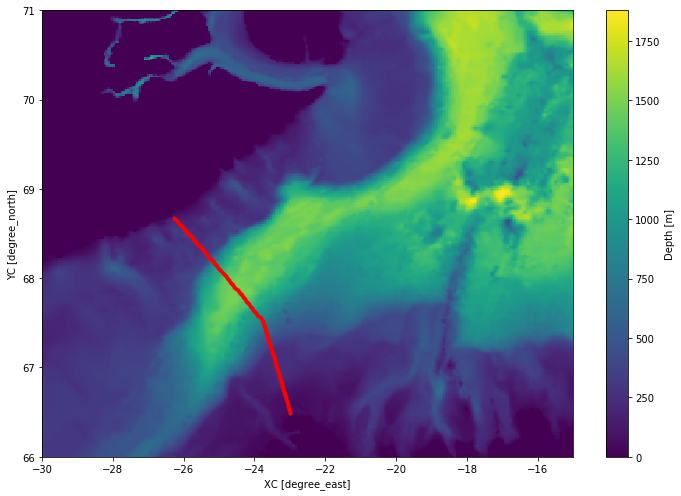

In [16]:
# Plot map
fig, ax = plt.subplots(1,1, figsize=(10, 7))
ax = ospy.plot.horizontal_section(od.set_projection(None), varName='Depth')
_ = ax.plot(od_survey.dataset['XC'].squeeze(), od_survey.dataset['YC'].squeeze(), 'r.')

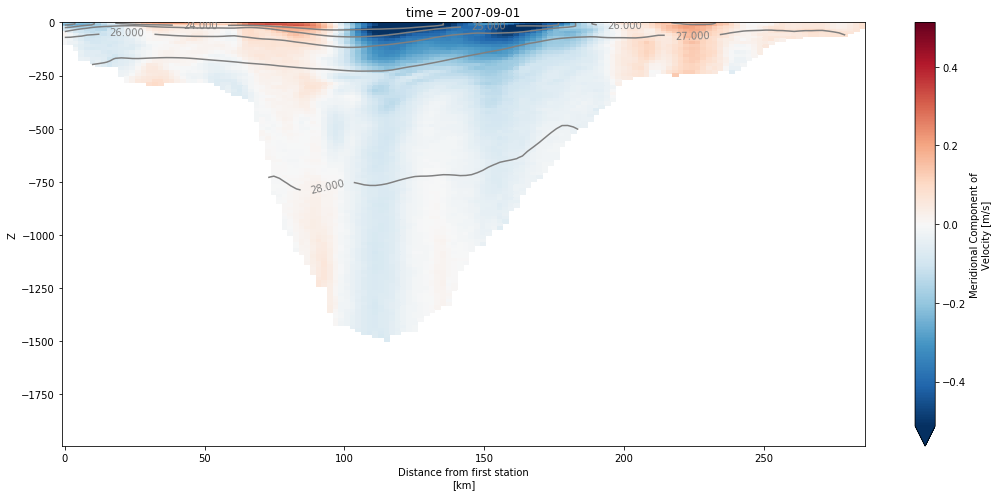

In [17]:
# Plot vertical section
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
_ = od_survey.plot.vertical_section(varName='V', contourName='Sigma0', robust=True)

We can now compare the vertical sections obtained using `subsample.mooring_array` VS `subsample.survey_stations`.

Regridding [V] along [Y]-axis.


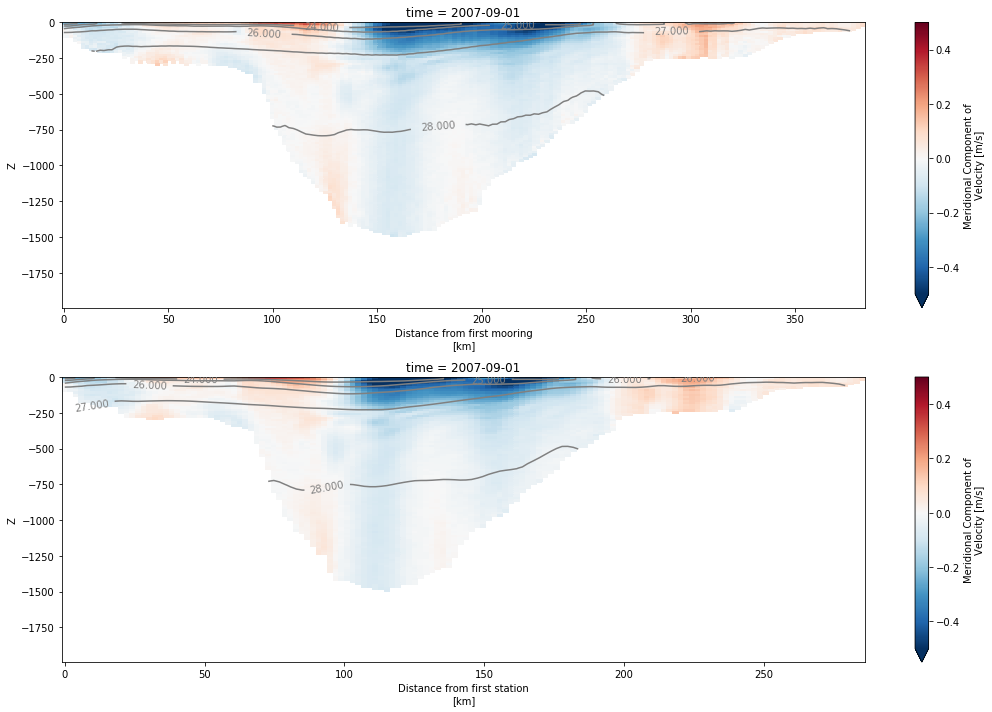

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
for i, (ax, this_od) in enumerate(zip(axes, [od_Kogur, od_survey])):
    _ = this_od.plot.vertical_section(varName='V', contourName='Sigma0', ax=ax, vmax=0.5)

## Particle properties
OceanSpy will have Lagrangian capabilities in the future (we are planning to migrate our Matlab code). `subsample_properties` extracts Eulerian properties of particles using nearest-neighbor interpolation. The resulting oceandataset only preserve the time axis, and add a new dimension called particle.  
Here is an example where we create 10 random paths at the surface, and we extract the particle density (density needs to be computed):

In [19]:
# Extract a cutout without land
cut_od = od.subsample.cutout(XRange=[-26, -20], 
                             YRange=[68, 69], 
                             ZRange=0).set_name('CUT', overwrite=False)
# Create 10 random paths
times   = cut_od.dataset['time']
n_parts = 10
Ypart = np.empty((len(times), n_parts)) 
Xpart = np.empty((len(times), n_parts)) 
Zpart = np.zeros((len(times), n_parts)) 
for p in range(n_parts):
    Ypart[:, p]= np.random.choice(cut_od.dataset['Y'], len(times))
    Xpart[:, p]= np.random.choice(cut_od.dataset['X'], len(times))

# Extract particles
parts_od = cut_od.subsample.particle_properties(times=times, Ypart=Ypart, Xpart=Xpart, Zpart=Zpart, varList='Sigma0')

Cutting out the oceandataset.
Cutting out the oceandataset.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Extracting Eulerian properties of particles.


/home/idies/workspace/Storage/malmans2/persistent/ESIP/oceanspy/oceanspy/subsample.py:1131: UserWarning: 
Particle properties extraction drops variables on `time_midp` dimension. 
Dropped variables: ['time_midp'].
  return particle_properties(self._od, **kwargs)


In [20]:
# Print grid
print(parts_od.grid)
print()
print(parts_od.dataset.coords)

<xgcm.Grid>
time Axis (not periodic):
  * center   time_midp (39) --> outer
  * outer    time (40) --> center

Coordinates:
  * particle   (particle) int64 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 2007-09-01 ... 2007-09-10T18:00:00
    Z          (time, particle) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    Zl         (time, particle) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Zp1        (time, particle) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Zu         (time, particle) float64 -2.0 -2.0 -2.0 -2.0 ... -2.0 -2.0 -2.0
    X          (time, particle) float64 -24.71 -20.61 -25.14 ... -24.49 -25.23
    Y          (time, particle) float64 68.07 68.01 68.55 ... 68.53 68.17 68.17
    XC         (time, particle) float64 dask.array<shape=(40, 10), chunksize=(40, 10)>
    YC         (time, particle) float64 dask.array<shape=(40, 10), chunksize=(40, 10)>
  * time_midp  (time_midp) datetime64[ns] 2007-09-01T03:00:00 ... 2007-09-10T15:00:00


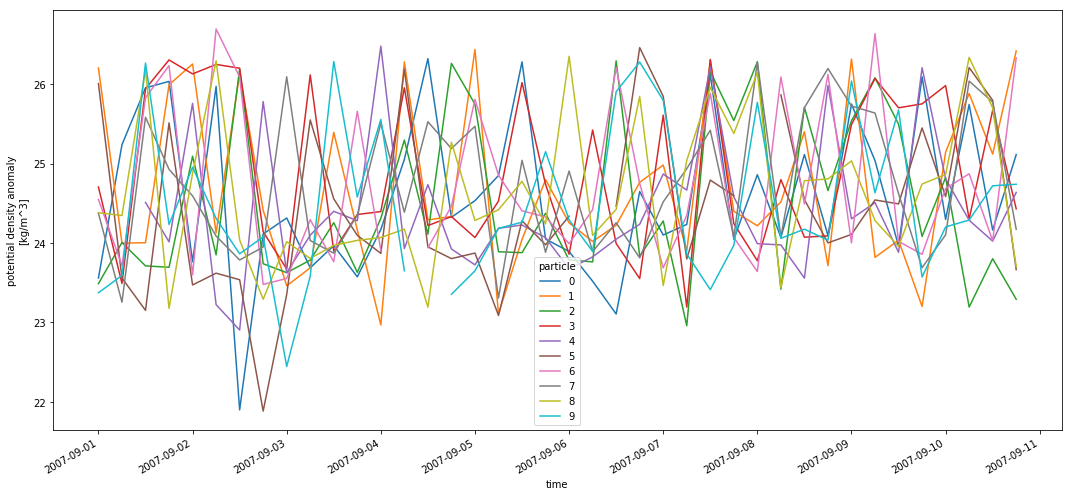

In [21]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax = parts_od.plot.time_series(varName='Sigma0')